# Build a SVM model with RBF kernel

## Preparing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
x[:5, :], y[:5]

(array([[   19, 19000],
        [   35, 20000],
        [   26, 43000],
        [   27, 57000],
        [   19, 76000]]),
 array([0, 0, 0, 0, 0]))

In [ ]:
# Split data into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## Build the model and predict with it

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(x_train_scaled, y_train)

SVC(random_state=0)

In [ ]:
y_pred = svm_model.predict(x_test_scaled)

In [ ]:
np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), 1)[:20, :]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0]])

## Model evaluation

0.93


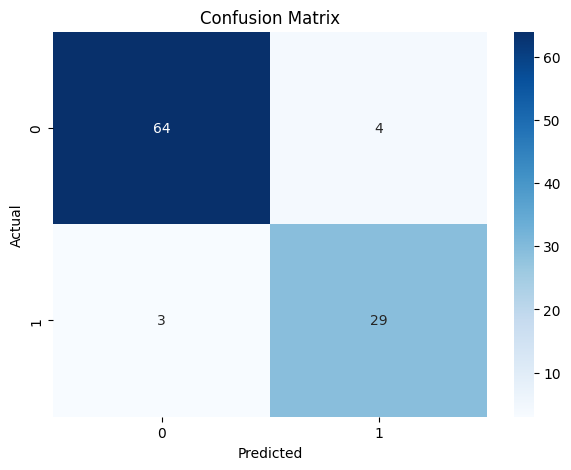

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

print(accuracy_score(y_test, y_pred))

plt.figure(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred)
axe = sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')

axe.set_xlabel("Predicted")
axe.set_ylabel("Actual")
axe.set_title("Confusion Matrix")

plt.show()

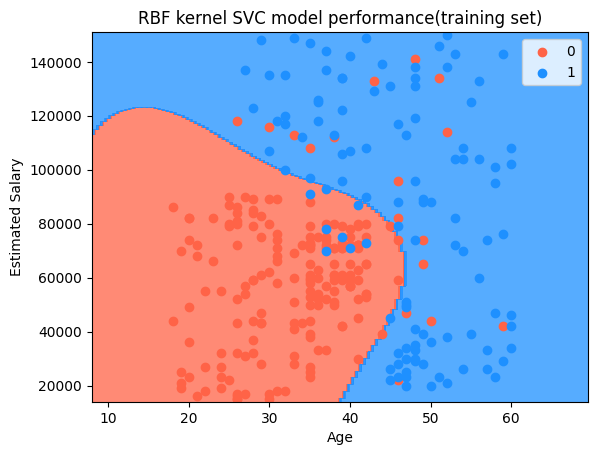

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=0.5))
plt.contourf(X1, X2, svm_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('tomato', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], color=ListedColormap(("tomato", "dodgerblue"))(i), label=j)

plt.title("RBF kernel SVC model performance(training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

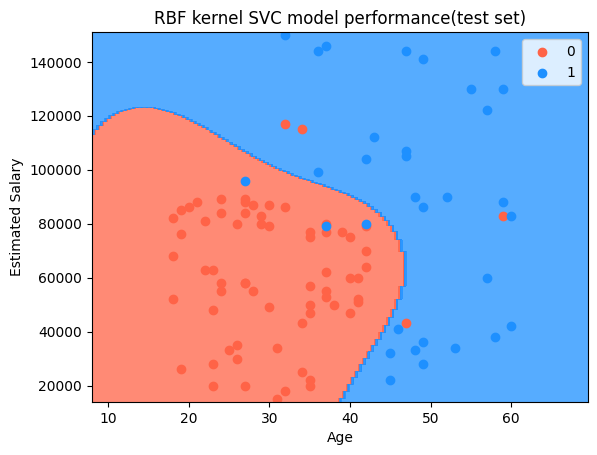

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=0.5))
plt.contourf(X1, X2, svm_model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('tomato', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], color=ListedColormap(("tomato", "dodgerblue"))(i), label=j)

plt.title("RBF kernel SVC model performance(test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()